<a href="https://colab.research.google.com/github/lineality/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module2-sampling-confidence-intervals-and-hypothesis-testing/GGA_132_v01_asnment_LS_DS_132_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

As outlined as permissible by TLs, this Assignment was done in a group including Geoffrey Gordon Ashbrook and Vera Mendes. 

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
# TODO - your code!

One way of looking at a P-value, is that it is a kind of magnifying glass that amplifies noise vs. signal. Why would you want such a thing? Whenever you are wondering how much 'noise' there is in a set of data, how much noise there is an an argument being touted on the news, you find yourself to be very interested in how much noise is hidden here or there or swept under the carpet or left out of that dubious looking graph with unlabeled axis units. If you had such a noise-descriminating, noise-amplifying magnifying class (e.g. by using squares you amplify the noisy patterns), you could look through and see how much of the data was noiseless. 

With a slight bit of reification, the P-value is just such a magnifying glass, it gives you a kind of 'margin of noise,' which you can translate into a % reliability, with the standard translation of decimal to percent: a P-Value of .05 is 5% likely noise, or 95% noiseless or 95% confidence. Is a given confidence % good enough? Does that easily translate into inverses and generalizations beyond continued narrow observation prediction? There are both clear practical uses and nuanced debates and disagreements.

(Given this 'crystal ball' there is bound to be disagreement over what exactly this means: what exactly are we confident in, with observations vs. predictions and positive vs. negative being contested. Details, details:
https://en.wikipedia.org/wiki/P-value
https://en.wikipedia.org/wiki/Confusion_of_the_inverse)


1. "Generate and numerically represent a confidence interval"

Here are two ways of generating a confidence interval.

Method 1.
The confidence interval is defined by the P-value. 

Step 1: find the p-value.

Step 2: derive the confidence intervale from the p-value.


Method 2. 

Step 3. use an equation to calculate a p-value based on standard error etc.

Step 4.
represent both versions of the p value.

This will be done using both coin and political data.





In [0]:
#Importing libraries

import pandas as pd
import numpy as np 
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel, t, ttest_1samp
import scipy.stats as stats
import seaborn as sns
from matplotlib import style
import matplotlib.pyplot as plt

In [24]:
#loading file
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2019-09-17 21:48:30--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data.2’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.1s    

2019-09-17 21:48:30 (127 KB/s) - ‘house-votes-84.data.2’ saved [18171/18171]



In [0]:
df = pd.read_csv('house-votes-84.data', 
                 header=None,
                 names=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa'])


In [0]:
# cleaning: +NaN, string to int
df = df.replace({'?':np.NaN, 'n':0, 'y':1})


In [30]:
df.head(2)

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN


In [0]:
#use "filtering" to create two new party based df (so much for nonpartisan dataframes...a sad day)
dem = df[df['party'] == 'democrat']
rep = df[df['party'] == 'republican']

In [0]:
vote_means = pd.DataFrame({'Democrats': dem.mean(),'Republicans': rep.mean()})

In [35]:
vote_means.head()

,Democrats,Republicans
handicapped-infants,0.604651,0.187879
water-project,0.502092,0.506757
budget,0.888462,0.134146
physician-fee-freeze,0.054054,0.987879
el-salvador-aid,0.215686,0.951515


Step 1 / Method 1 - Using P

In [0]:
import numpy as np
coinflips = np.random.binomial(n=1, p=.5, size=500)
#print(np.std(coinflips, ddof=1))
#print(coinflips)

In [17]:
#single sample t-tests
# passing nan_policy='omit' 
ttest_1samp(coinflips, 0)

Ttest_1sampResult(statistic=22.071837438354297, pvalue=7.771041767088428e-76)

The p value is very small: 5.6*10^-75

  
  Use t-distribution & a two-tailed test, with a modest default of 95% confidence. 
  
  The Arguments:
    Data: iterable (list or numpy array) of sample observations
    Confidence: level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  

In [0]:
# Step 3: method 1: calculate confidence interval, not based on P

def conf_int(data, confidence=0.95):

  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  # stderr = stats.sem(data)
  stderr = np.std(data, ddof=1) / np.sqrt(n)
  margin_of_error = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)
  print(margin_of_error)
  return (mean, mean - margin_of_error, mean + margin_of_error)

In [0]:
coinflips_42 = np.random.binomial(n=1, p=.5, size=42)

Here is an example of a confidence interval from a coin flip:

Question: how do these two methods differ? In theory they should report the same confidence interval. 

In [41]:

coinflips = np.random.binomial(n=1, p=.5, size=500)
conf_int(coinflips)

0.043954161621218124


(0.516, 0.4720458383787819, 0.5599541616212181)

Here is an example of a confidence interval from political data:


In [42]:
conf_int(rep['water-project'].dropna())

0.08149104629696514


(0.5067567567567568, 0.42526571045979167, 0.5882478030537219)

In [43]:
conf_int(dem['water-project'].dropna())

0.06384690925692016


(0.502092050209205, 0.43824514095228484, 0.5659389594661252)

In [44]:
conf_int(rep['religious-groups'].dropna())



0.046602875442389065


(0.8975903614457831, 0.850987486003394, 0.9441932368881721)

In [45]:
conf_int(dem['religious-groups'].dropna())


0.06135235940902927


(0.47674418604651164, 0.41539182663748236, 0.5380965454555409)

View:
e.g. when we are looking at coin flips, we are looking at different outcomes of a similar event. For votes, as such, each bill is only voted on once. E.g. we cannot repeat a vote by both parties on the same bill and compare to say whether that pattern is real or not. But...if instead of looking at each bill we look at 'partisan bills' Then the mean democrat or republican vote represents another iteration, another event, another coin flip, of the same 'partisanship test'. 

In [48]:

conf_int(vote_means['Republicans'])

0.19417529013307575


(0.5202842153559785, 0.3261089252229027, 0.7144595054890542)

In [50]:
conf_int(vote_means['Democrats'])

0.14306189750794837


(0.5272036172051706, 0.3841417196972222, 0.670265514713119)

In [51]:
ttest_1samp(vote_means['Republicans'], 0)

Ttest_1sampResult(statistic=5.711126032679941, pvalue=4.1226248809213136e-05)

In [53]:
ttest_1samp(vote_means['Democrats'], 0)

Ttest_1sampResult(statistic=7.854697371442037, pvalue=1.0783745469257049e-06)

## Representation of confidense intervals

To start with: an anti-graph:

With all bills lumped together, yes, no bipartisan, what exactly are we looking at? What should we be looking for? 
E.g. for looking at partisanship, we need to make sure the coin has two clear sides, we need to make sure each test-iteration is an iteration of the same 'event': do party members vote yes for a partsican bill along with their party. 

So we will make a list of the mean yes-with-party votes.

---



0.19417529013307575
0.14306189750794837


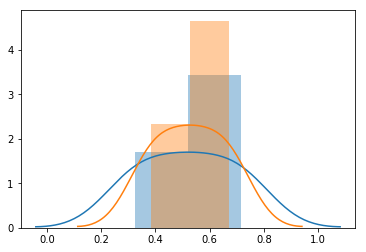

In [54]:
#import matplotlib.pyplot as plt
y1 = conf_int(vote_means['Republicans'])
y2 = conf_int(vote_means['Democrats'])

fix, ax = plt.subplots()
for sample in [y1, y2]:
  sns.distplot(sample)

In [61]:
print (np.mean(dem['anti-satellite-ban']))
print (np.mean(dem['budget']))
print (np.mean(dem['aid-to-contras']))
print (np.mean(dem['handicapped-infants']))
print (np.mean(dem['mx-missile']))

0.7722007722007722
0.8884615384615384
0.8288973384030418
0.6046511627906976
0.7580645161290323


In [0]:
dem_votes = []
def add_dem(column):
  for i in column:
    dem_votes.append(i)
  pass

In [0]:
add_dem(dem['anti-satellite-ban'])
add_dem(dem['budget'])
add_dem(dem['aid-to-contras'])
add_dem(dem['handicapped-infants'])
add_dem(dem['mx-missile'])


In [62]:
print (np.mean(rep['physician-fee-freeze']))
print (np.mean(rep['el-salvador-aid']))
print (np.mean(rep['right-to-sue']))
print (np.mean(rep['religious-groups']))
print (np.mean(rep['education']))

0.9878787878787879
0.9515151515151515
0.8607594936708861
0.8975903614457831
0.8709677419354839


In [0]:
rep_votes = []
def add_rep(column):
  for i in column:
    rep_votes.append(i)
  pass

In [0]:
add_rep(dem['physician-fee-freeze'])
add_rep(dem['el-salvador-aid'])
add_rep(dem['right-to-sue'])
add_rep(dem['religious-groups'])
add_rep(dem['education'])

In [122]:
len(rep_votes2)

1335

In [101]:
len(dem_votes)

1602

In [0]:
#checking again for NaN values
rep_votes2 = [x for x in rep_votes if x != 'nan,']



In [0]:
dem_votes_short = dem_votes [:1335]

In [110]:
len(dem_votes_short)

1335

AttributeError: ignored

In [0]:
votes_df = {'Democrats Voted':dem_votes_short,'Republicans Voted':rep_votes}

votes_df = pd.DataFrame(votes_df, columns=['Democrats Voted','Republicans Voted'])


In [115]:
votes_df.head()

,Democrats Voted,Republicans Voted
0,0.0,NaN
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,1.0


In [0]:
votes_df2 = votes_df.dropna()

In [131]:
votes_df2.shape

(1234, 2)

##4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

In [0]:
print(ttest_ind(rep['water-project'], dem['water-project'], nan_policy='omit'))
print(rep['water-project'].mean(), 'Republican mean')
print(dem['water-project'].mean(), 'Democratic mean')

Ttest_indResult(statistic=0.08896538137868286, pvalue=0.9291556823993485)
0.5067567567567568 Republican mean
0.502092050209205 Democratic mean


Here the pvalue above .5, indicates a similarity between the two means compared.
I think: The null hypothesis is that they are not different, and the result showing that they are very similar falls in the catagory of failing to disprove (the null hypothesis) that they are different (a.k.a. this is evidence that they are similar).

And the T value being near 0 shows they are similar...

Ttest_indResult(statistic=0.08896538137868286, pvalue=0.9291556823993485)
0.5067567567567568 Republican mean
0.502092050209205 Democratic mean

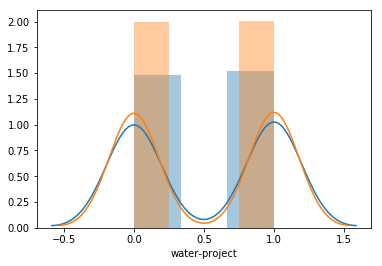

In [0]:
print(ttest_ind(rep['religious-groups'], dem['religious-groups'], nan_policy='omit'))
print(rep['religious-groups'].mean(), 'Republican mean')
print(dem['religious-groups'].mean(), 'Democratic mean')

Ttest_indResult(statistic=9.737575825219457, pvalue=2.3936722520597287e-20)
0.8975903614457831 Republican mean
0.47674418604651164 Democratic mean


Due to our test resulting in a T-Statistic of 9.737575825219457 and a P-value of 2.3936722520597287e-20: we reject the null hypothesis that the two vote means are not different.

Here the small pvalue below .5, indicates a lack of similarity between the two means compared.
I think: The null hypothesis is that they are not different, and the result showing that they are different means strongly rejecting (the null hypothesis) that they are not different (a.k.a. this is evidence that they are are different (in a way beyond mere change result).

Ttest_indResult(statistic=9.737575825219457, pvalue=2.3936722520597287e-20)
0.8975903614457831 Republican mean
0.47674418604651164 Democratic mean

As for representation, this may be indirect, but I like the way it shows how when values are comparable and the difference is samll, the p value is high (e.g. the similarity could be by chance since there is not much difference, or any distinction would be 'noisy'), whereas when the difference is large and clear the p-value is small. So in terms of confidence: low confidence when distinctions are unclear, and high confidence when distinctions are clear.  

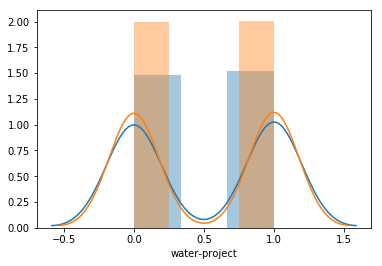

In [37]:
#import matplotlib.pyplot as plt
y1 = rep['water-project'].dropna()
y2 = dem['water-project'].dropna()

fix, ax = plt.subplots()
for sample in [y1, y2]:
  sns.distplot(sample)

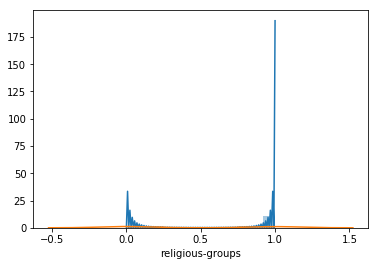

In [0]:
#import matplotlib.pyplot as plt
y1 = rep['religious-groups'].dropna()
y2 = dem['religious-groups'].dropna()

fix, ax = plt.subplots()
for sample in [y1, y2]:
  sns.distplot(sample)

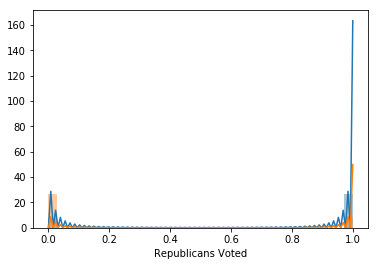

In [133]:
#import matplotlib.pyplot as plt
y1 = votes_df2['Democrats Voted']
y2 = votes_df2['Republicans Voted']

fix, ax = plt.subplots()
for sample in [y1, y2]:
  sns.distplot(sample)

0.02343028262265263
0.023718119770020075


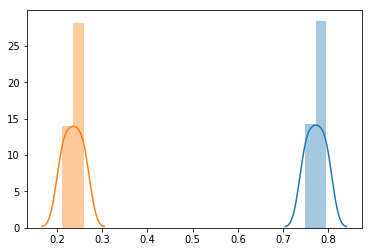

In [134]:
#import matplotlib.pyplot as plt
y1 = conf_int(votes_df2['Democrats Voted'])
y2 = conf_int(votes_df2['Republicans Voted'])

fix, ax = plt.subplots()
for sample in [y1, y2]:
  sns.distplot(sample)

In [136]:
conf_int(votes_df2['Democrats Voted'])

0.02343028262265263


(0.7722852512155591, 0.7488549685929065, 0.7957155338382118)

In [135]:
conf_int(votes_df2['Republicans Voted'])

0.023718119770020075


(0.23581847649918963, 0.21210035672916955, 0.2595365962692097)

0.15316449851372824


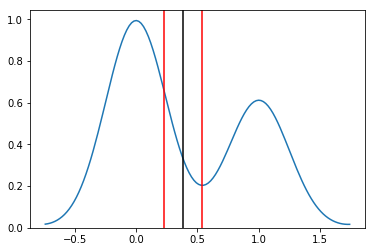

In [21]:
import seaborn as sns
coinflips_42 = np.random.binomial(n=1, p=.5, size=42)
sns.kdeplot(coinflips_42)
CI = conf_int(coinflips_42)
plt.axvline(x=CI[1], color='red')
plt.axvline(x=CI[2], color='red')
plt.axvline(x=CI[0], color='k');

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)